In [1]:
import regression as r

In [2]:
colunas = [
    'rho_water', 'rho_ice', 'rho_sed_up', 'rho_sed_mid', 
    'rho_sed_low', 'rho_cryst_up', 'rho_cryst_mid', 
    'rho_cryst_low', 'rho_mantle'
]

data_rho = r.pd.read_csv(
    'crust-model/crust1.0/crust1-rho.csv', 
    sep = '\s+', # colunas separadas por 1 ou mais espaço
    names = colunas # nomes das colunas
)

data_bnds = r.pd.read_csv(
    'crust-model/crust1.0/crust1-bnds.csv', 
    sep = '\s+', # colunas separadas por 1 ou mais espaço
    names = colunas # nomes das colunas
)



In [3]:
lats = r.np.arange(89.5, -90, -1) # o primeiro é incluído, e o modelo exige os centros nos pontos medios 
lons = r.np.arange(-179.5, 180, 1)
camadas = r.np.arange(1,10)

rho_3d = data_rho.values.reshape(180, 360, 9) # 360 é o loop, segundo argumento
bnds_3d = data_bnds.values.reshape(180, 360, 9)

print(rho_3d[0][0])
print(rho_3d.shape)
print()

print(rho_3d)

[1.02 0.92 1.93 0.   0.   2.55 2.85 3.05 3.34]
(180, 360, 9)

[[[1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  ...
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]]

 [[1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  ...
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]]

 [[1.02 0.92 1.93 ... 2.85 3.05 3.35]
  [1.02 0.92 1.93 ... 2.85 3.05 3.35]
  [1.02 0.92 1.93 ... 2.85 3.05 3.35]
  ...
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]
  [1.02 0.92 1.93 ... 2.85 3.05 3.34]]

 ...

 [[1.02 0.92 2.26 ... 2.74 2.91 3.34]
  [1.02 0.92 2.26 ... 2.74 2.91 3.34]
  [1.02 0.92 2.26 ... 2.74 2.91 3.34]
  ...
  [1.02 0.92 2.26 ... 2.74 2.91 3.36]
  [1.02 0.92 2.26 ... 2.74 2.91 3.36]
  [1.02 0.92 2.26 ... 2.74 2

In [4]:
df = r.xr.Dataset(
    data_vars = { 
        'rho': (['lat', 'lon', 'layer'], rho_3d), # uma tupla com os rótulos das coordenadas e a matriz
        'boundaries': (['lat', 'lon', 'layer'], bnds_3d)}, 
                 
    coords = {
        'lat': lats, # será atribuído nas coordenadas de latitude os valores do vetor lats; essa celula vai ter esse valor de latitude
        'lon': lons,
        'layer': camadas}
)
    

df.boundaries


<xarray.DataArray 'boundaries' (lat: 180, lon: 360, layer: 9)> Size: 5MB
array([[[  0.  ,  -3.69,  -3.69, ...,  -5.67,  -7.15, -11.75],
        [  0.  ,  -3.66,  -3.66, ...,  -5.64,  -7.13, -11.74],
        [  0.  ,  -3.64,  -3.64, ...,  -5.62,  -7.11, -11.72],
        ...,
        [  0.  ,  -3.76,  -3.76, ...,  -6.01,  -7.66, -12.76],
        [  0.  ,  -3.75,  -3.75, ...,  -6.  ,  -7.65, -12.75],
        [  0.  ,  -3.72,  -3.72, ...,  -6.32,  -8.74, -16.23]],

       [[  0.  ,  -3.09,  -3.09, ...,  -4.81,  -6.42, -11.38],
        [  0.  ,  -3.07,  -3.07, ...,  -4.8 ,  -6.42, -11.4 ],
        [  0.  ,  -3.09,  -3.09, ...,  -4.83,  -6.44, -11.41],
        ...,
        [  0.  ,  -3.01,  -3.01, ...,  -4.74,  -6.35, -11.3 ],
        [  0.  ,  -3.03,  -3.03, ...,  -4.76,  -6.37, -11.33],
        [  0.  ,  -3.07,  -3.07, ...,  -5.26,  -7.87, -15.93]],

       [[  0.  ,  -3.79,  -3.79, ...,  -6.3 ,  -7.85, -12.65],
        [  0.  ,  -3.8 ,  -3.8 , ...,  -6.3 ,  -7.86, -12.65],
        [  0.  ,  -3.8 ,  -3.8 , ...,  -6.3 ,  -7.85, -12.64],
        ...,
...
        [  3.02,   3.02,   1.02, ..., -13.18, -26.58, -39.98],
        [  3.02,   3.02,   1.02, ..., -13.18, -26.58, -39.98],
        [  3.02,   3.02,   1.02, ..., -13.12, -26.55, -39.98]],

       [[  3.07,   3.07,   0.72, ..., -12.68, -25.3 , -37.91],
        [  3.07,   3.07,   0.71, ..., -12.69, -25.3 , -37.91],
        [  3.07,   3.07,   0.7 , ..., -12.7 , -25.3 , -37.91],
        ...,
        [  3.07,   3.07,   0.77, ..., -12.58, -25.26, -37.93],
        [  3.07,   3.07,   0.75, ..., -12.6 , -25.27, -37.93],
        [  3.07,   3.07,   0.73, ..., -12.61, -25.27, -37.93]],

       [[  2.86,   2.86,   0.13, ..., -13.2 , -24.67, -36.15],
        [  2.86,   2.86,   0.13, ..., -13.2 , -24.67, -36.15],
        [  2.85,   2.85,   0.13, ..., -13.19, -24.67, -36.15],
        ...,
        [  2.87,   2.87,   0.12, ..., -13.2 , -24.67, -36.13],
        [  2.87,   2.87,   0.12, ..., -13.2 , -24.67, -36.13],
        [  2.86,   2.86,   0.12, ..., -13.2 , -24.67, -36.14]]],
      shape=(180, 360, 9))
Coordinates:
  * lat      (lat) float64 1kB 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * layer    (layer) int64 72B 1 2 3 4 5 6 7 8 9

In [5]:
df *= 1000 # ajustando para SI os parametros, aplica direto para as variaveis
df.boundaries

<xarray.DataArray 'boundaries' (lat: 180, lon: 360, layer: 9)> Size: 5MB
array([[[     0.,  -3690.,  -3690., ...,  -5670.,  -7150., -11750.],
        [     0.,  -3660.,  -3660., ...,  -5640.,  -7130., -11740.],
        [     0.,  -3640.,  -3640., ...,  -5620.,  -7110., -11720.],
        ...,
        [     0.,  -3760.,  -3760., ...,  -6010.,  -7660., -12760.],
        [     0.,  -3750.,  -3750., ...,  -6000.,  -7650., -12750.],
        [     0.,  -3720.,  -3720., ...,  -6320.,  -8740., -16230.]],

       [[     0.,  -3090.,  -3090., ...,  -4810.,  -6420., -11380.],
        [     0.,  -3070.,  -3070., ...,  -4800.,  -6420., -11400.],
        [     0.,  -3090.,  -3090., ...,  -4830.,  -6440., -11410.],
        ...,
        [     0.,  -3010.,  -3010., ...,  -4740.,  -6350., -11300.],
        [     0.,  -3030.,  -3030., ...,  -4760.,  -6370., -11330.],
        [     0.,  -3070.,  -3070., ...,  -5260.,  -7870., -15930.]],

       [[     0.,  -3790.,  -3790., ...,  -6300.,  -7850., -12650.],
        [     0.,  -3800.,  -3800., ...,  -6300.,  -7860., -12650.],
        [     0.,  -3800.,  -3800., ...,  -6300.,  -7850., -12640.],
        ...,
...
        [  3020.,   3020.,   1020., ..., -13180., -26580., -39980.],
        [  3020.,   3020.,   1020., ..., -13180., -26580., -39980.],
        [  3020.,   3020.,   1020., ..., -13120., -26550., -39980.]],

       [[  3070.,   3070.,    720., ..., -12680., -25300., -37910.],
        [  3070.,   3070.,    710., ..., -12690., -25300., -37910.],
        [  3070.,   3070.,    700., ..., -12700., -25300., -37910.],
        ...,
        [  3070.,   3070.,    770., ..., -12580., -25260., -37930.],
        [  3070.,   3070.,    750., ..., -12600., -25270., -37930.],
        [  3070.,   3070.,    730., ..., -12610., -25270., -37930.]],

       [[  2860.,   2860.,    130., ..., -13200., -24670., -36150.],
        [  2860.,   2860.,    130., ..., -13200., -24670., -36150.],
        [  2850.,   2850.,    130., ..., -13190., -24670., -36150.],
        ...,
        [  2870.,   2870.,    120., ..., -13200., -24670., -36130.],
        [  2870.,   2870.,    120., ..., -13200., -24670., -36130.],
        [  2860.,   2860.,    120., ..., -13200., -24670., -36140.]]],
      shape=(180, 360, 9))
Coordinates:
  * lat      (lat) float64 1kB 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * layer    (layer) int64 72B 1 2 3 4 5 6 7 8 9

In [6]:
rho_layer = df.rho.sel(layer = 8) # apenas pra uma camada, a matriz vira 2D
rho_layer


<xarray.DataArray 'rho' (lat: 180, lon: 360)> Size: 518kB
array([[3050., 3050., 3050., ..., 3050., 3050., 3050.],
       [3050., 3050., 3050., ..., 3050., 3050., 3050.],
       [3050., 3050., 3050., ..., 3050., 3050., 3050.],
       ...,
       [2910., 2910., 2910., ..., 2910., 2910., 2910.],
       [2910., 2910., 2910., ..., 2910., 2910., 2910.],
       [2910., 2910., 2910., ..., 2910., 2910., 2910.]], shape=(180, 360))
Coordinates:
  * lat      (lat) float64 1kB 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    layer    int64 8B 8

In [7]:
ellipsoid = r.bl.WGS84
rho_ref = 2670.0

df_model = df.sortby("lat").isel(lon=slice(0, 359))

In [8]:
# 1. Carregar o grid de gravidade calculado anteriormente
gravity_grid = r.xr.open_dataset("crust-model/crust1.0/modelo_crustal_gravidade.nc")

# 2. ADAPTAÇÃO DA TOPOGRAFIA: Combinando Layer 1 e Layer 2
# Layer 1 = Topo da água (0 no mar, montanha na terra)
# Layer 2 = Fundo da água (batimetria no mar, montanha na terra)
l1 = df_model.boundaries.sel(layer=1)
l2 = df_model.boundaries.sel(layer=2)

# Onde o topo é maior que a base, existe água; pegamos a base (batimetria). 
# Caso contrário, estamos em terra; pegamos o topo (elevação).
topografia_solida = r.xr.where(l1 > l2, l2, l1)

# Renomear e interpolar para a grade de gravidade (10km altitude)
topografia = topografia_solida.rename({'lat': 'latitude', 'lon': 'longitude'}).interp_like(gravity_grid)

# 3. Geoide e Integração de Dados
fname = r.ensaio.fetch_earth_geoid(version=1)
geoid_data = r.xr.open_dataset(fname)
geoid_resampled = geoid_data.geoid.interp_like(gravity_grid)

data_synth = r.xr.merge([
    gravity_grid.rename({'gravity_ell_synth': 'gravity'}),
    topografia.rename('topography'),
    geoid_resampled.rename('geoid')
])

# 4. Cálculos Geofísicos
# Gravidade Normal no elipsoide a 10.000m
gamma_synth = r.bl.WGS84.normal_gravity(data_synth.latitude, 10000)

# Distúrbio de gravidade (Gravity Disturbance)
disturbance_synth = data_synth.gravity - gamma_synth

# Topografia referenciada ao Geoide (Altura Ortométrica)
topography_adjust_synth = data_synth.topography + data_synth.geoid

# Correção de Bouguer utilizando a topografia sólida
bouguer_corr_synth = r.hm.bouguer_correction(topography_adjust_synth)

# Anomalia de Bouguer Sintética
data_synth['dg_bouguer'] = disturbance_synth - bouguer_corr_synth

data_synth

<xarray.Dataset> Size: 3MB
Dimensions:     (latitude: 181, longitude: 361)
Coordinates:
  * latitude    (latitude) float64 1kB -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
  * longitude   (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
    radius      (latitude, longitude) float64 523kB ...
Data variables:
    gravity     (latitude, longitude) float64 523kB ...
    topography  (latitude, longitude) float64 523kB nan nan nan ... nan nan nan
    geoid       (latitude, longitude) float64 523kB -29.5 -29.5 ... 15.4 15.4
    dg_bouguer  (latitude, longitude) float64 523kB nan nan nan ... nan nan nan

In [9]:
data = data_synth

data



<xarray.Dataset> Size: 3MB
Dimensions:     (latitude: 181, longitude: 361)
Coordinates:
  * latitude    (latitude) float64 1kB -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
  * longitude   (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
    radius      (latitude, longitude) float64 523kB ...
Data variables:
    gravity     (latitude, longitude) float64 523kB ...
    topography  (latitude, longitude) float64 523kB nan nan nan ... nan nan nan
    geoid       (latitude, longitude) float64 523kB -29.5 -29.5 ... 15.4 15.4
    dg_bouguer  (latitude, longitude) float64 523kB nan nan nan ... nan nan nan

In [10]:
topo_raw = data.topography.values.ravel()
dg_raw = data.dg_bouguer.values.ravel()
    
region = r.vd.get_region((data.longitude.values, data.latitude.values))
lon_grid, lat_grid = r.vd.grid_coordinates(region=region, shape=data.topography.shape, meshgrid=True)
lon_raw, lat_raw = lon_grid.ravel(), lat_grid.ravel()

mask = ~r.np.isnan(topo_raw) & ~r.np.isnan(dg_raw)
h, d = topo_raw[mask], dg_raw[mask]
lon, lat = lon_raw[mask], lat_raw[mask]

In [11]:
df_windows, indices = r.windows_regression(data, h, d, lon, lat, window_size=4.0, overlap=0.5, min_points = 4, trava = True)
df_windows.to_csv('df_windows.csv')

df_windows_mixed_coefs = df_windows.dropna(subset = ['a_o', 'a_c', 'b'])
df_windows_mixed_coefs.to_csv('df_windows_mixed_coefs.csv')

df_windows_ocean = df_windows[df_windows['a_c'].isna()]
df_windows_ocean.to_csv('df_windows_ocean.csv')

df_windows_continent = df_windows[df_windows['a_o'].isna()]
df_windows_continent.to_csv('df_windows_continent.csv')

#df_fodase = df_windows[df_windows['r2'] < 0.7]
#df_fodase.to_csv('df_fodase.csv')

print(f' \nMédia de pontos no oceano por janela: {r.np.mean(df_windows.ocean_points)}')
print(f'Média de pontos no continente por janela: {r.np.mean(df_windows.continent_points)}\n')

df_erros_continente = df_windows[(df_windows.continent_points > 0) & (df_windows.a_c.isna())]
print(f"Total de janelas com terra 'ignoradas': {len(df_erros_continente)}")
df_erros_continente.to_csv('df-erros-continente.csv')


v_o = 0.06
print(f'\nJanelas de oceano com coeficiente maiores que |{v_o}|: {len(df_windows.a_o[(df_windows.a_o < -v_o) | (df_windows.a_o > v_o)])}')

v_c = 0.06
print(f'Janelas de continente com coeficiente maiores que |{v_c}|: {len(df_windows.a_c[(df_windows.a_c < -v_c) | (df_windows.a_c > v_c)])}')

v_r = 0.01
print(f'Janelas com r2 < {v_r}: {len(df_windows[df_windows.r2 < v_r])}\n')


#df_windows[(df_windows.a_o < -v_o) | (df_windows.a_o > v_o)]
#df_windows[(df_windows.a_c < -v_c) | (df_windows.a_c > v_c)]

df_windows_continent[df_windows_continent.r2 < v_r]



 0 janelas foram ignoradas por falta de dados.
 
Média de pontos no oceano por janela: 20.028227398341887
Média de pontos no continente por janela: 10.360639557836558

Total de janelas com terra 'ignoradas': 331

Janelas de oceano com coeficiente maiores que |0.06|: 727
Janelas de continente com coeficiente maiores que |0.06|: 2730
Janelas com r2 < 0.01: 856



,longitude,latitude,a_o,a_c,b,r2,original-idx,total_points,ocean_points,continent_points
49,-102.478519,-81.0,NaN,0.010687,-140.868906,-0.003005,49,130,0,130
77,-105.511446,-79.0,NaN,-0.013825,-162.963905,0.001988,77,100,0,100
78,-95.010302,-79.0,NaN,-0.000372,-120.219686,0.000080,78,105,0,105
126,26.280396,-77.0,NaN,-0.013943,-470.821989,0.000050,126,90,0,90
2273,-59.998403,-33.0,NaN,-0.041821,145.889473,-0.002496,2273,25,0,25
...,...,...,...,...,...,...,...,...,...,...
9711,-138.185222,67.0,NaN,-0.004895,67.910497,0.001800,9711,50,0,50
9753,75.991790,67.0,NaN,-0.010904,103.759472,-0.002566,9753,55,0,55
9823,105.482701,69.0,NaN,-0.028300,210.180506,-0.006741,9823,60,0,60
9824,111.060738,69.0,NaN,0.016878,210.653150,0.007346,9824,55,0,55


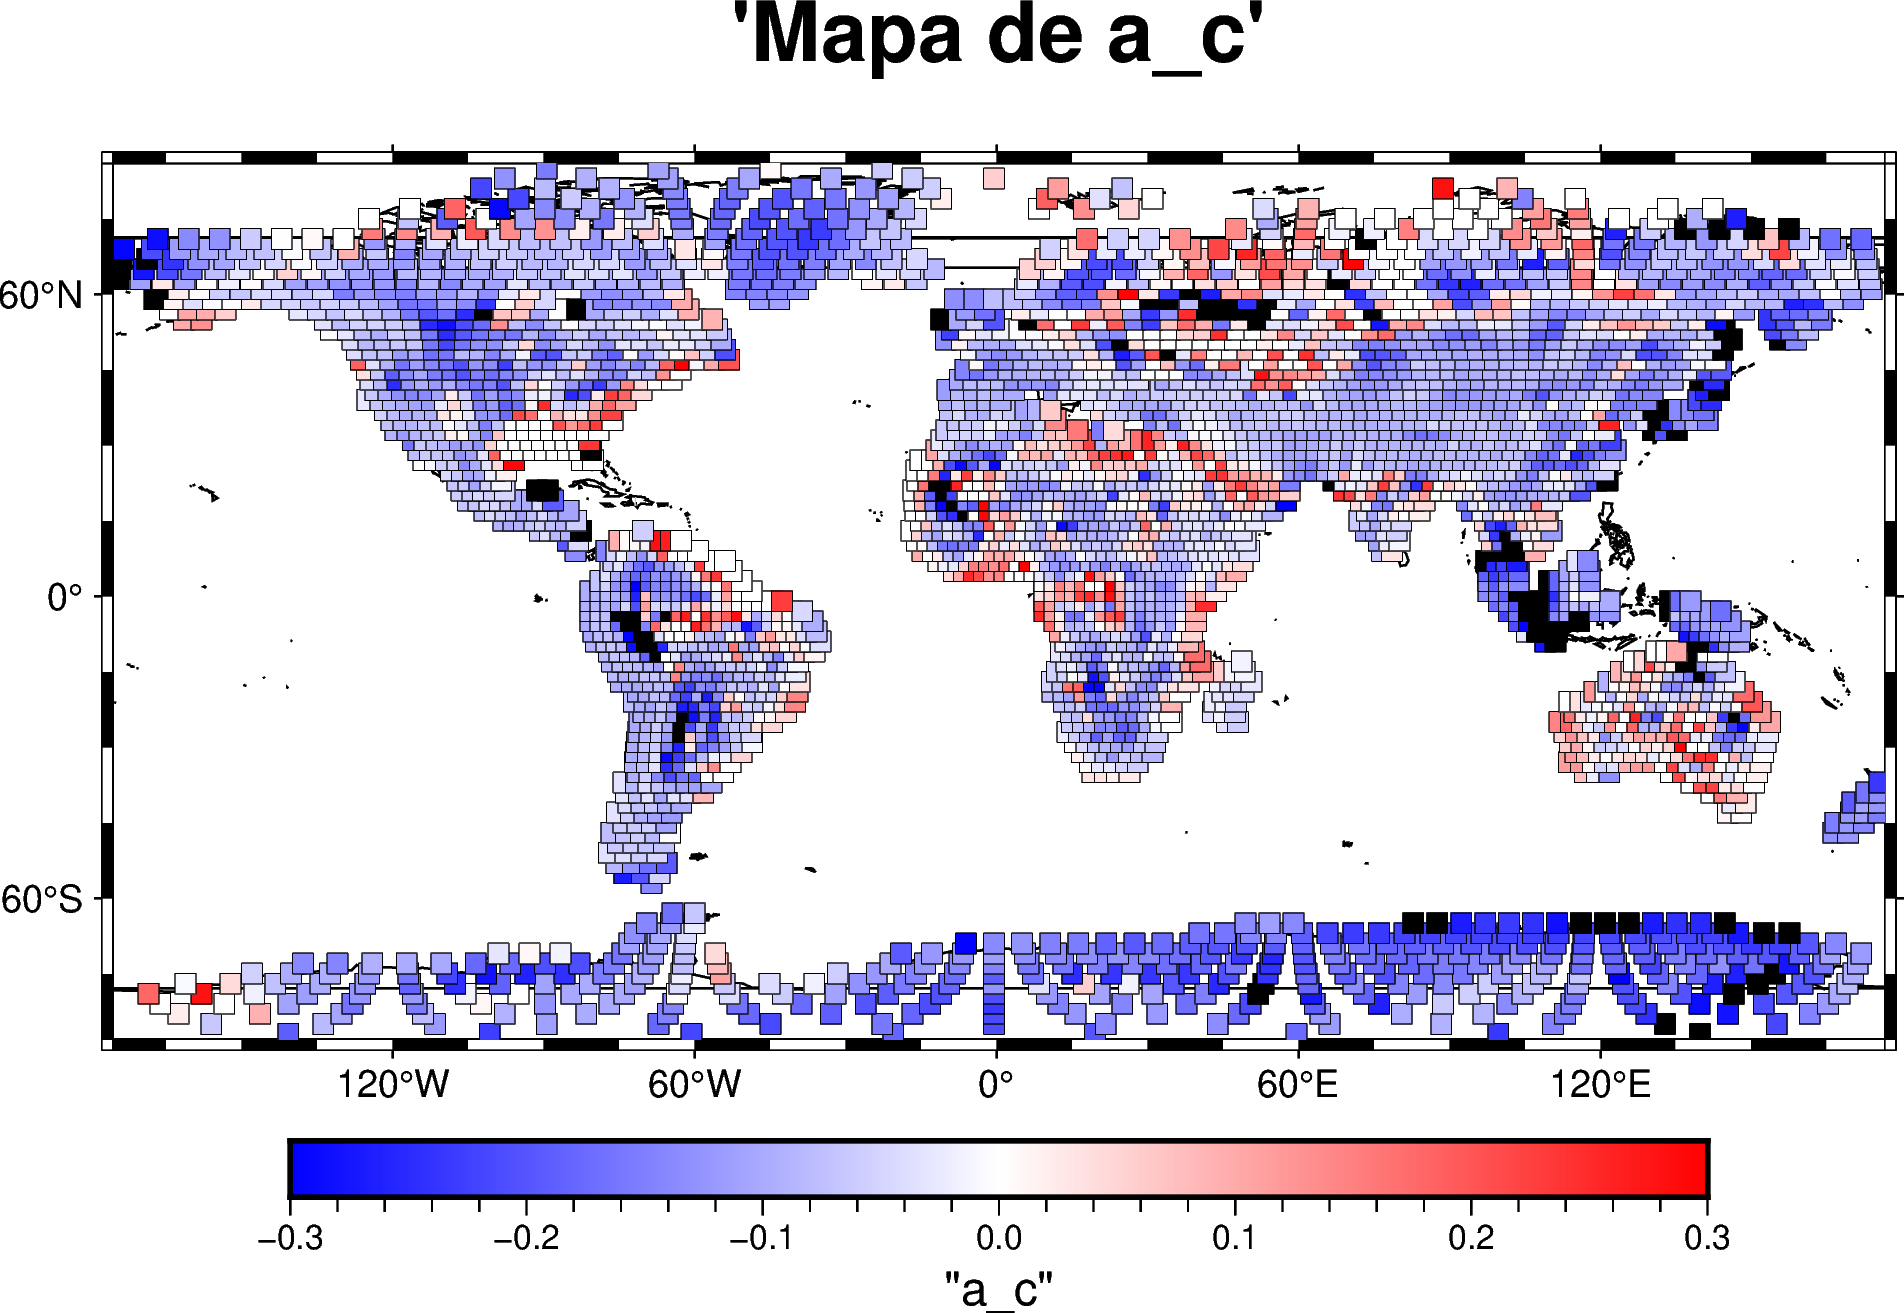

In [12]:

fig_r2 = r.plot_parameters_map(df_windows, 'r2', v_range = [0, 1], step = 0.01, cmap='viridis', reverse=False, projection = 'W')
#fig_r2.coast(shorelines='1p,black')
fig_r2.savefig('mapa-r2.png')

fig_a_o = r.plot_parameters_map(df_windows, 'a_o', v_range = [-0.3, 0.3], step = 0.01, cmap = 'polar', reverse = False, projection = 'Q')
fig_a_o.coast(shorelines = '0.5p,black')
fig_a_o.savefig('mapa-a_o.png')

fig_a_c = r.plot_parameters_map(df_windows, 'a_c', v_range = [-0.3, 0.3], step = 0.01, cmap = 'polar', reverse = False, projection = 'Q')
#fig_a_c.coast(shorelines = '0.5p,black')
fig_a_c.savefig('mapa-a_c.png')

fig_a_c.show()

# Acessando a janela mais próxima dadas as coordenadas
.
.
.
.
.
.
.
.
.
.
.
.
.
.













In [13]:
# achando janela mais próxima a um ponto dada a coordenada 
lon_window = 101
lat_window = -5


distances = r.np.sqrt((df_windows['longitude'] - lon_window)**2 + (df_windows['latitude'] - lat_window)**2)

distances

window_minor_distance = distances.idxmin()
line_in_df_minor_distance = df_windows.loc[df_windows['original-idx'] == window_minor_distance]

line_in_df_minor_distance


,longitude,latitude,a_o,a_c,b,r2,original-idx,total_points,ocean_points,continent_points
4674,101.785345,-5.0,0.00829,NaN,59.350371,0.149995,4674,20,17,3


In [14]:
idx_current = indices[window_minor_distance][0]
idx_current

h_window_raw = h[idx_current]
d_window_raw = d[idx_current]

idx_sort = r.np.argsort(h_window_raw)
h_window = h_window_raw[idx_sort]
d_window = d_window_raw[idx_sort]

p_window = r.robust_regression(h_window, d_window, min_points = 5)
a_ocean_window, a_continent_window, intercept_window, r2_window = p_window

p_window

(np.float64(0.00829001064929047),
 nan,
 np.float64(59.35037071887589),
 np.float64(0.14999474368552745))

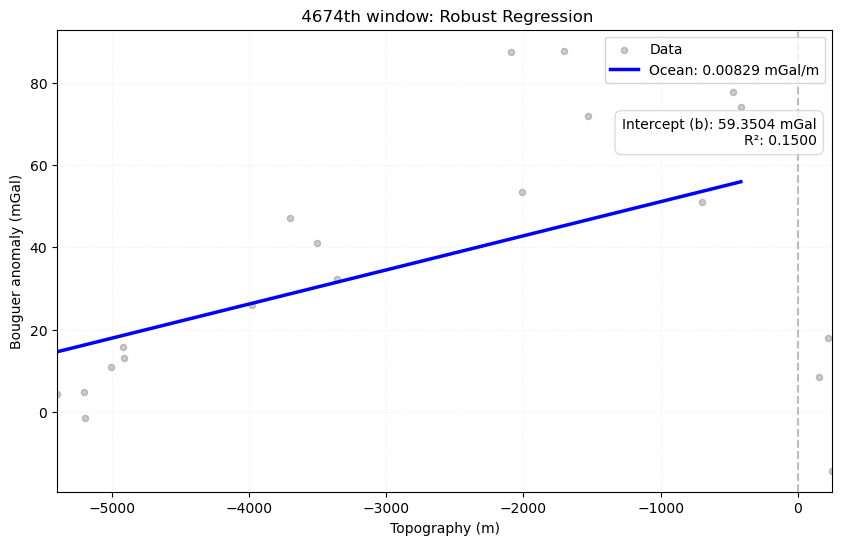

In [15]:
r.plot_window_regression(window_minor_distance, h_window, d_window, a_ocean_window, a_continent_window, intercept_window, r2_window)

O círculo rosa é a localização da janela.



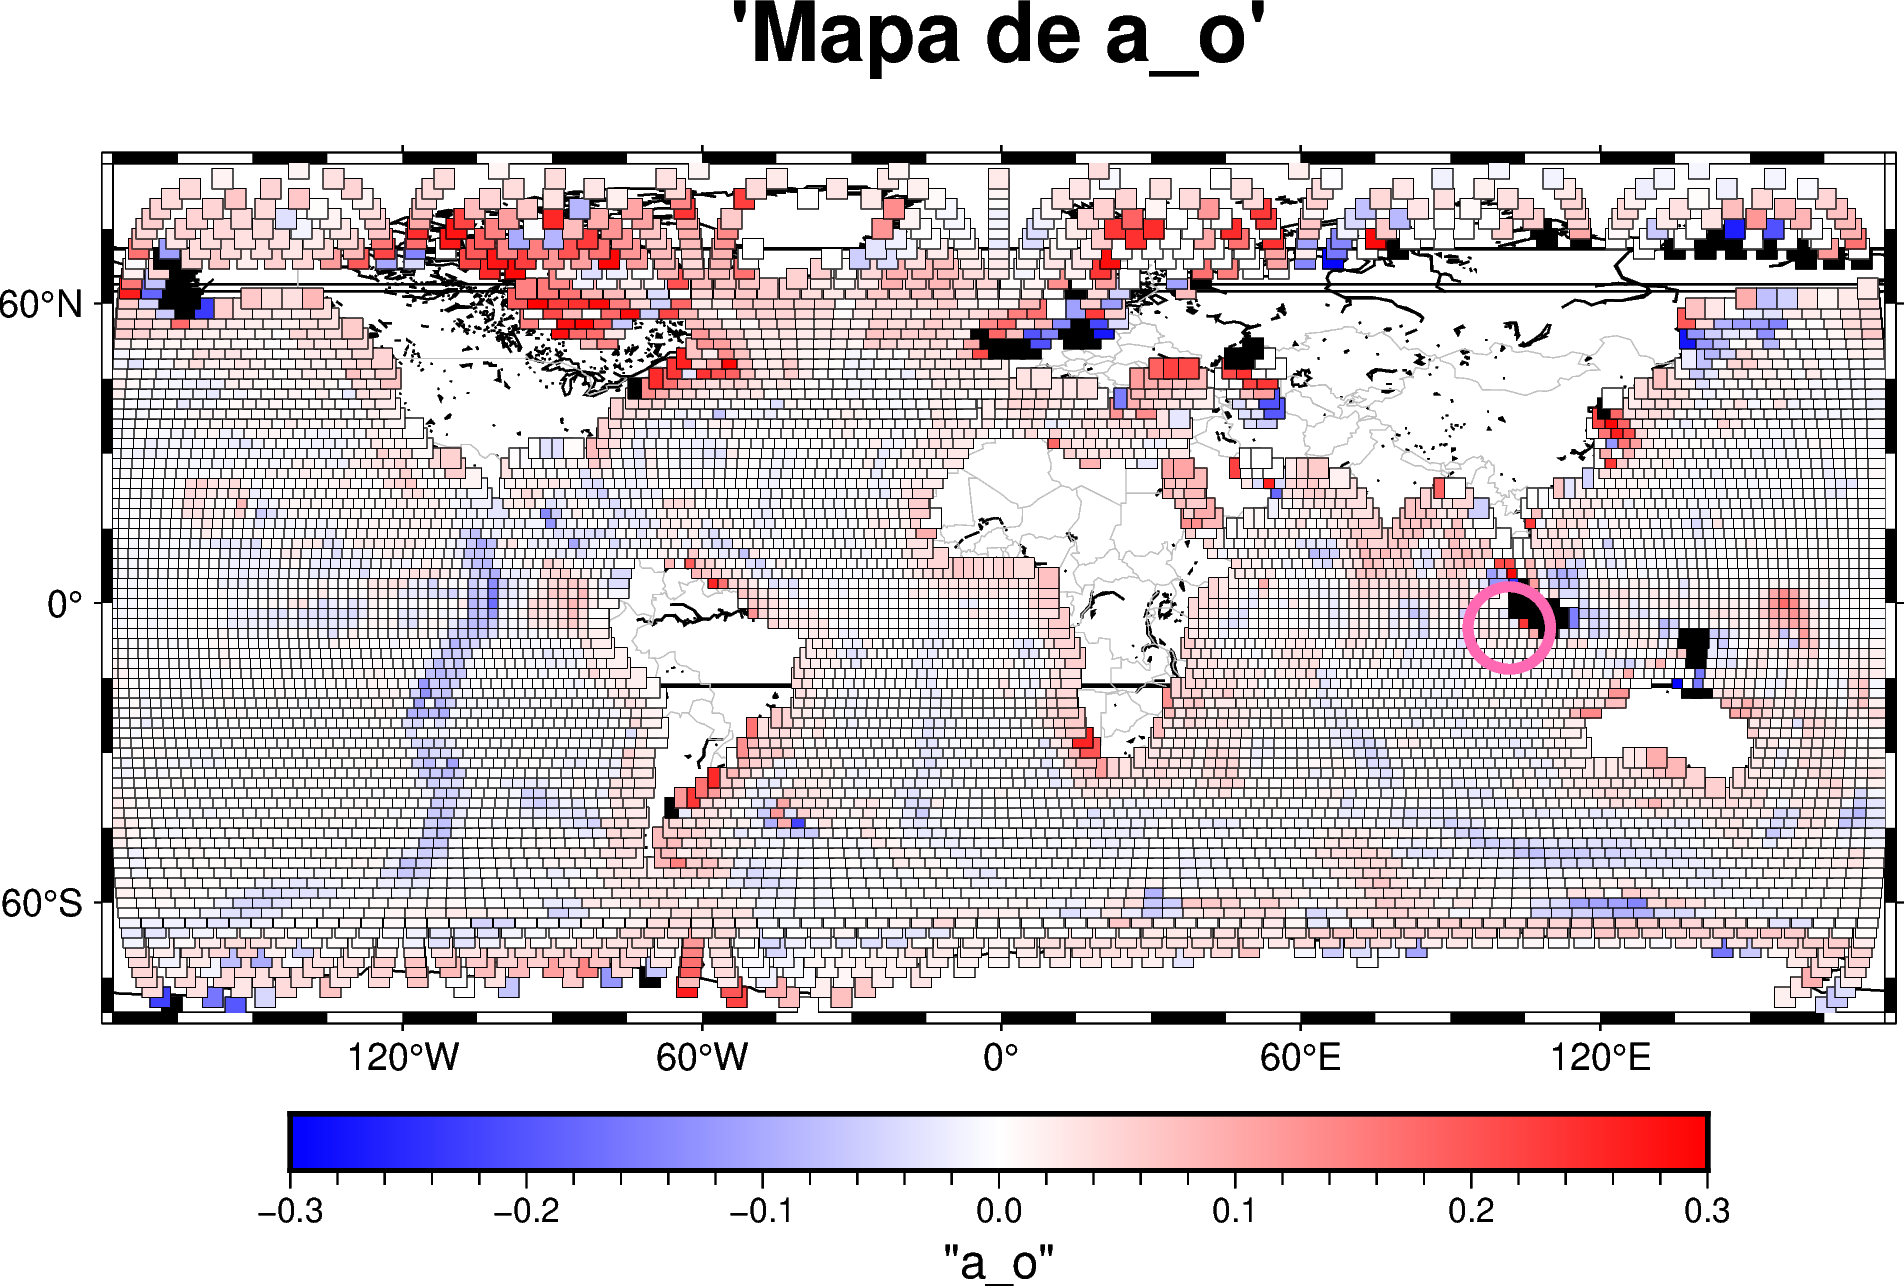

In [16]:
lon_alvo = df_windows.loc[window_minor_distance, 'longitude']
lat_alvo = df_windows.loc[window_minor_distance, 'latitude']

# 2. Gerar o mapa base (ele retorna o objeto 'fig')
fig = r.plot_parameters_map(df_windows, 'a_o', v_range=[-0.3, 0.3], step=0.01, cmap='polar', reverse=False, projection = 'Q')

#fig.coast(shorelines='0.5p,black')


# 3. Desenhar um círculo de destaque sobre o mapa
# Criamos um "efeito de borda" com dois círculos sobrepostos
fig.plot(
    x=lon_alvo, 
    y=lat_alvo, 
    style='c0.7c', 
    pen='2.5p,hotpink' 
)

print('O círculo rosa é a localização da janela.')
print()
fig.show()

# Acessando janela específica

In [17]:
# janela especifica que quero acessar
i_wished_window = 83
line_in_df = df_windows.loc[df_windows['original-idx'] == i_wished_window] # localizo original-idx

if not line_in_df.empty: # para caso a linha não esteja no df 
    lon = line_in_df['longitude'].values[0] # [0] para o pandas não bugar, ele ve values como filtro
    lat = line_in_df['latitude'].values[0]

    print(f'A janela {i_wished_window} tem coordenadas: Longitude {lon:.2f} e Latitude {lat:.2f}')

else:
    print(f'A janela não está no df e pode ter sido descartada ou está vazia')

line_in_df

A janela 83 tem coordenadas: Longitude -42.50 e Latitude -79.00


,longitude,latitude,a_o,a_c,b,r2,original-idx,total_points,ocean_points,continent_points
83,-42.504578,-79.0,0.0751,-0.060067,32.76906,0.20086,83,100,33,67


In [18]:
idx_current = indices[i_wished_window][0]

h_window_raw = h[idx_current]
d_window_raw = d[idx_current]

# crio uma lista com os índices de h_window_raw que colocam o array em ordem numérica ex: [28, 3, 87] é o que deicaria o array em ordem
idx_sort = r.np.argsort(h_window_raw)
h_window = h_window_raw[idx_sort]
d_window = d_window_raw[idx_sort]

p_window = r.robust_regression(h_window, d_window, min_points = 5)
a_ocean_window, a_continent_window, intercept_window, r2_window = p_window

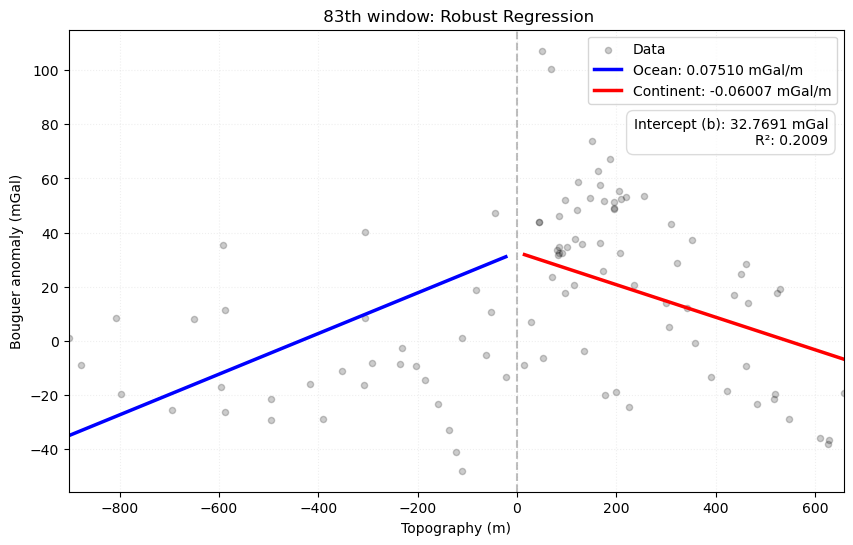

In [19]:
r.plot_window_regression(i_wished_window, h_window, d_window, a_ocean_window, a_continent_window, intercept_window, r2_window)

O círculo rosa é a localização da janela.



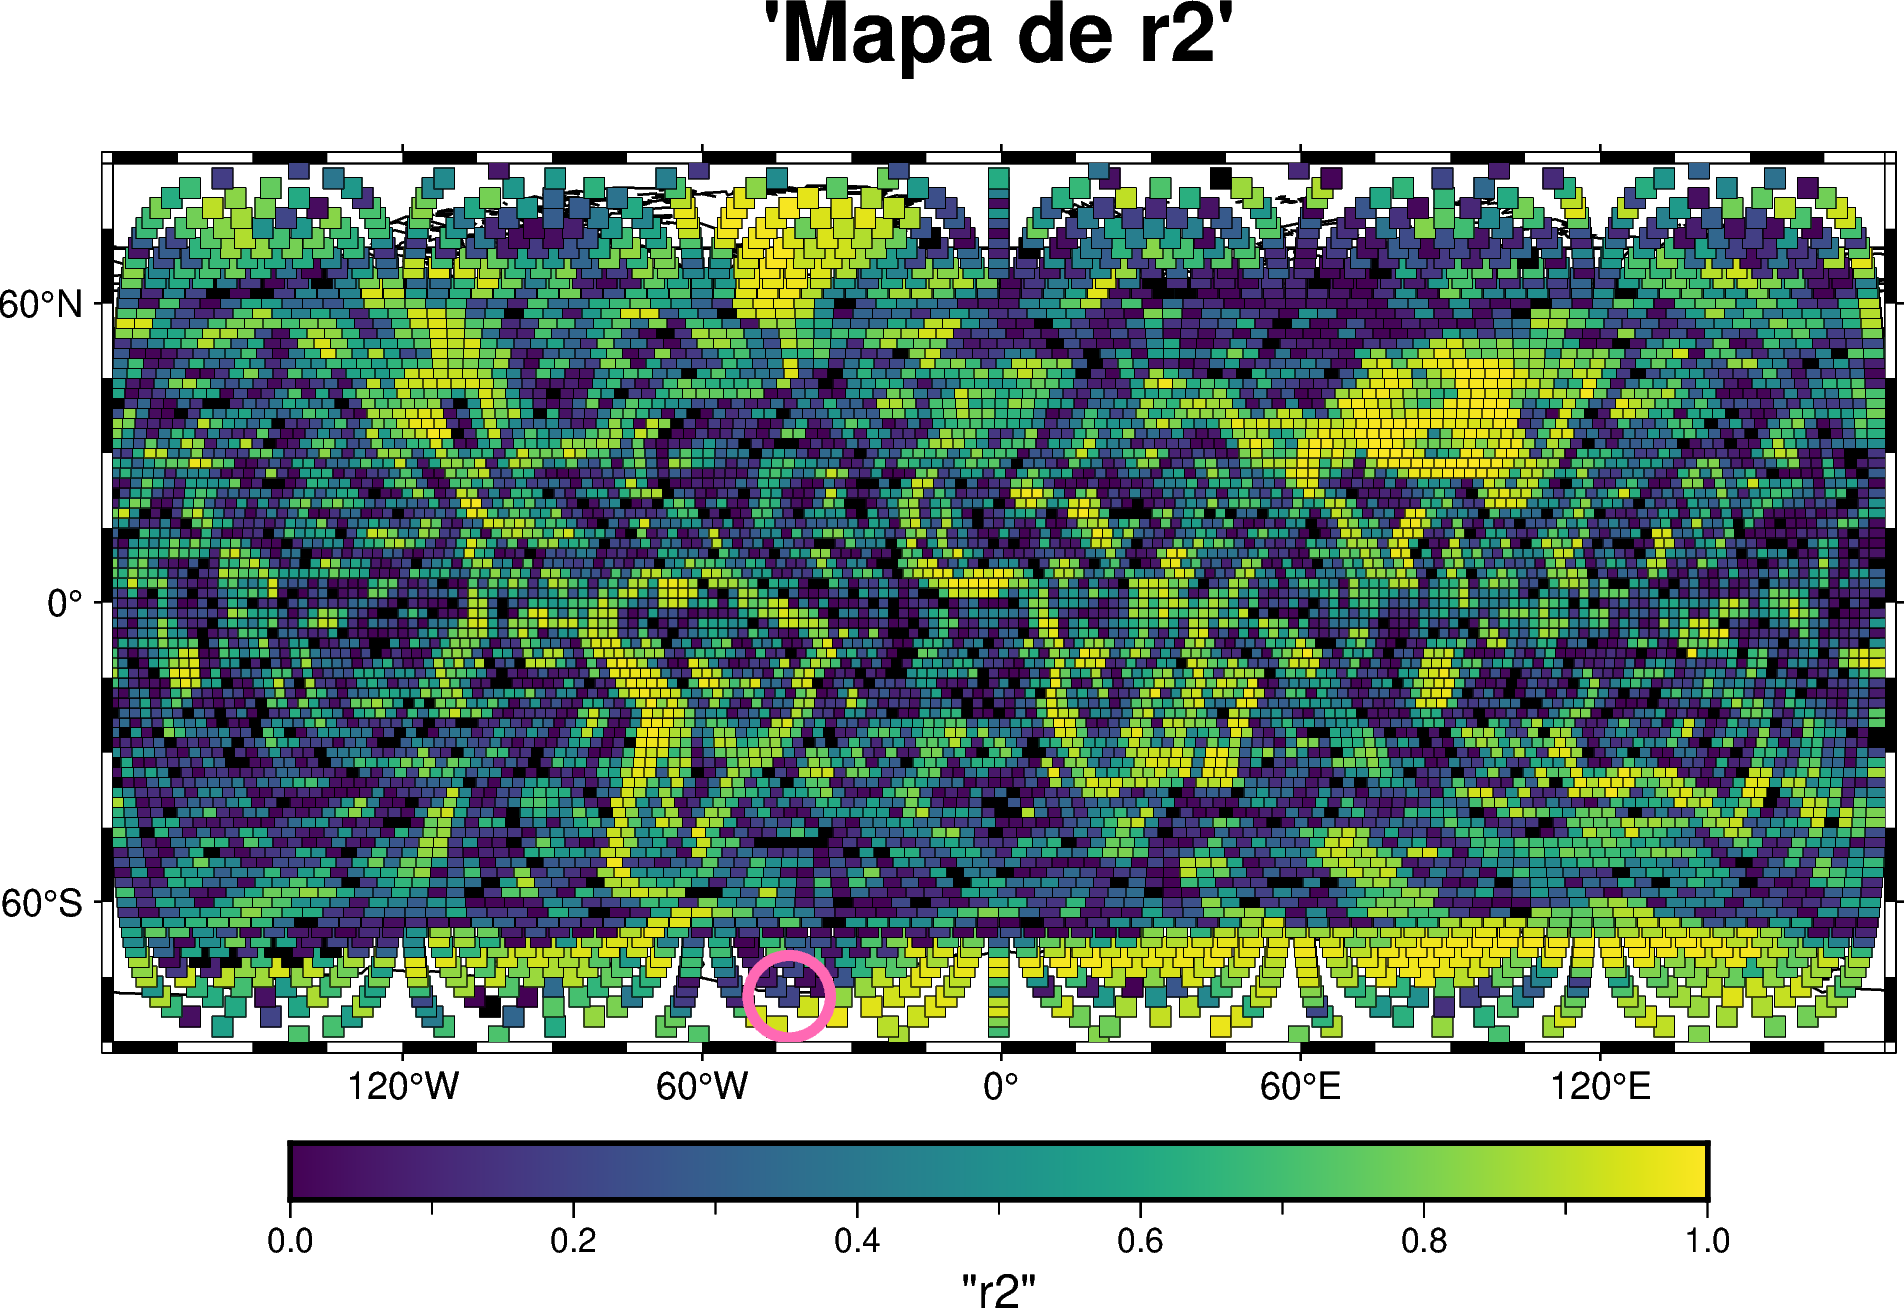

In [20]:
lon_alvo = df_windows.loc[i_wished_window, 'longitude']
lat_alvo = df_windows.loc[i_wished_window, 'latitude']

# 2. Gerar o mapa base (ele retorna o objeto 'fig')
fig = r.plot_parameters_map(df_windows, 'r2', v_range=[0, 1], step=0.01, cmap='viridis', reverse=False, projection = 'Q')
#fig.coast(shorelines='0.5p,black')


# 3. Desenhar um círculo de destaque sobre o mapa
# Criamos um "efeito de borda" com dois círculos sobrepostos
fig.plot(
    x=lon_alvo, 
    y=lat_alvo, 
    style='c0.7c',  # 'c' para circle, 0.7cm de tamanho
    pen='2.5p,hotpink' # Contorno branco grosso
)

print('O círculo rosa é a localização da janela.')
print()
fig.show()